# Objective :

#### In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). 
##### We need to recognize a single digit from multi-digit numbers in photographs captured at street level housing number dataset.
#### To start with , we will first use KNN for classification of digits and then Neural network.

### Let us first import all required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import matplotlib.pyplot as plt
import os

In [3]:
os.chdir("C:/Great_lakes/AI/Week-4")

#### Need to import h5py to read .h5 file.

In [5]:
import h5py

In [85]:
svhn = h5py.File('SVHN_single_grey1.h5','r')

In [86]:
svhn

<HDF5 file "SVHN_single_grey1.h5" (mode r+)>

In [183]:
np.array(svhn)[:5]

array(['X_test', 'X_train', 'X_val', 'y_test', 'y_train'], dtype='<U7')

Above output shows that we are not provided with 'X_test', 'X_train', 'X_val', 'y_test' and 'y_train' but y_val is missing and that is why we'll proceed with 'X_test', 'X_train', 'y_test' and 'y_train'.

#### Now let us extract X_test', 'X_train', 'y_test' and 'y_train' from .h5 file imported 

In [96]:
X_train = svhn['X_train'][:]
y_train = svhn['y_train'][:]

X_test = svhn['X_test'][:]
y_test = svhn['y_test'][:]

###  Now let us check the shape of train and test data

In [97]:
print('Training set', X_train.shape, y_train.shape)
print('Test set', X_test.shape, y_test.shape)

Training set (42000, 32, 32) (42000,)
Test set (18000, 32, 32) (18000,)


##### Above code shows that provided data is a 3 dimesional array and hence required to be flattened in to two dimesional array as shown below :

In [155]:
X_train = X_train.reshape(42000, 1024)

In [99]:
X_train.shape

(42000, 1024)

In [156]:
X_test=X_test.reshape(18000,1024)

In [101]:
X_test.shape

(18000, 1024)

As shown above now train and test is convered into 2 dimensional array of 42000 X 1024 and 18000 X 1024 respectively.

Let us check first row provided in X_test

In [102]:
X_test[1]

array([115.1609, 114.161 , 113.1611, ...,  42.1388,  48.2522,  53.2517],
      dtype=float32)

In [103]:
X_train.dtype

dtype('<f4')

Since KNN takes much time to learn , We need to pass lesser images data into train and test both as shown in below code

In [108]:
X_train_knn=X_train[0:20000]

In [119]:
X_test_knn=X_test[0:5000]

In [120]:
y_train_knn=y_train[0:20000]

In [121]:
y_test_knn=y_test[0:5000]

In [111]:
X_train_knn.shape

(20000, 1024)

In [112]:
X_test_knn.shape

(5000, 1024)

Let is visualize one sample output

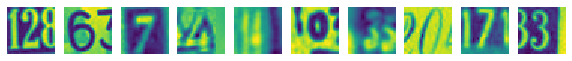

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [113]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32))
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

Let us use gridsearch CV for best accuracy

In [128]:
from sklearn.model_selection import GridSearchCV

In [131]:
param_grid = { 
    'n_neighbors': [3,4],
    'weights' :['distance'],
}

In [132]:
NNH = KNeighborsClassifier()

In [133]:
CV_NNH = GridSearchCV(estimator=NNH, param_grid=param_grid, cv= 5)
CV_NNH.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 4], 'weights': ['distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Now let us check best_params output

In [134]:
CV_NNH.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

Now let us get the predicted labels out of fitted model above along with scores

In [135]:
predicted_labels = CV_NNH.predict(X_test_knn)
CV_NNH.score(X_test_knn, y_test_knn)

0.457

#### Now let us creat clssification report

In [138]:
from sklearn.metrics import classification_report

In [139]:
print(metrics.confusion_matrix(y_test_knn, predicted_labels))

[[248  24   8  20  26  16  50  12  37  62]
 [ 16 315  26  21  29  18  15  35  12  16]
 [ 15  52 222  43  18  13  12  47  24  41]
 [ 22  55  33 162  24  52  22  29  36  26]
 [ 27  54  18  22 295  16  20  14  21  25]
 [ 47  30  16  63  21 177  65  16  47  40]
 [ 59  27  12  14  40  43 200  12  78  31]
 [ 15  54  42  30  14  13   8 275  15  10]
 [ 60  29  14  52  14  34  65  10 197  46]
 [ 62  27  28  30  16  27  29  23  63 194]]


# Neural Network

### Now let us try classification with Neural network using Keras

In [55]:
svhn_nn = h5py.File('SVHN_single_grey1.h5','r')

Now let us extract train and test sets from .h5 file

In [56]:
X_train_nn = svhn_nn['X_train'][:]
y_train_nn = svhn_nn['y_train'][:]

X_test_nn = svhn_nn['X_test'][:]
y_test_nn = svhn_nn['y_test'][:]

Now import tensorflow :

In [57]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

### Convert Output label to multiple values

In [58]:
y_train_nn = tf.keras.utils.to_categorical(y_train_nn, num_classes=10)
y_test_nn = tf.keras.utils.to_categorical(y_test_nn, num_classes=10)

## Build the Graph

In [59]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32X32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [60]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [61]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [62]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [63]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='sigmoid'))

In [64]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [65]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 60)                6060      
_________________________________________________________________
dense_3 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3

In [67]:
model.fit(X_train_nn,y_train_nn,
          epochs=100,batch_size=50)

Epoch 1/100
42000/42000 [==============================] - 4s 102us/sample - loss: 2.3064 - acc: 0.0988
Epoch 2/100
42000/42000 [==============================] - 5s 110us/sample - loss: 2.3042 - acc: 0.0993
Epoch 3/100
42000/42000 [==============================] - 4s 100us/sample - loss: 2.3039 - acc: 0.1004
Epoch 4/100
42000/42000 [==============================] - 4s 104us/sample - loss: 2.3039 - acc: 0.0987
Epoch 5/100
42000/42000 [==============================] - 5s 123us/sample - loss: 2.3038 - acc: 0.0993
Epoch 6/100
42000/42000 [==============================] - 5s 120us/sample - loss: 2.3036 - acc: 0.1013
Epoch 7/100
42000/42000 [==============================] - 5s 118us/sample - loss: 2.3034 - acc: 0.1017
Epoch 8/100
42000/42000 [==============================] - 4s 107us/sample - loss: 2.3034 - acc: 0.1021
Epoch 9/100
42000/42000 [==============================] - 5s 117us/sample - loss: 2.3034 - acc: 0.1035
Epoch 10/100
42000/42000 [==============================] - 5s 1

So, At 100th epoch , we have accuracy of 77.35 % at loss of 0.71%.

In [68]:
predicted_labels = model.predict(X_test_nn)

Now let us check model accuracy in test datasets :

In [75]:
scores = model.evaluate(X_test_nn, y_test_nn, verbose=0)

In [78]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 78.29%


So We achieved 78.29% accuracy in test dataset , which is close to train accuracy and hence our model is not overfitting.

Now Let us check the confusion matrix of neural network model which we just created :

In [81]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

In [83]:
matrix = metrics.confusion_matrix(y_test_nn.argmax(axis=1),predicted_labels.argmax(axis=1))

In [85]:
print(matrix)

[[1570   42   56   17   26    5   19   11   24   44]
 [  34 1534   31   33   78   14    2   83    7   12]
 [  26   56 1455   59   15    7    1  114   17   53]
 [  21   74   46 1255   17  188    4   36   41   37]
 [  43  149   22   17 1458   29   45    5   24   20]
 [  20   35   14  122   25 1374   52    6   97   23]
 [  79   28   17   11   69   95 1409    3  108   13]
 [  14  118  122   31   12    3    0 1485    7   16]
 [  63   32   25   44   33  123  109    6 1281   96]
 [ 114   39  108   75   17   44    7   12  116 1272]]


### Now let us use Relu activation function in one of the layers :

In [95]:
#Initialize Sequential model
model_2 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 32X32 to 1024
model_2.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))

#Normalize the data
model_2.add(tf.keras.layers.BatchNormalization())

In [96]:
#Add 1st hidden layer
model_2.add(tf.keras.layers.Dense(200, activation='sigmoid'))

In [101]:
#Add 2nd hidden layer
model_2.add(tf.keras.layers.Dense(100, activation='relu'))

In [102]:
#Add 3rd hidden layer
model_2.add(tf.keras.layers.Dense(60, activation='sigmoid'))

In [103]:
#Add 4th hidden layer
model_2.add(tf.keras.layers.Dense(30, activation='relu'))

In [104]:
#Add OUTPUT layer
model_2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [105]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model_2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [106]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dense_10 (Dense)             (None, 200)               205000    
_________________________________________________________________
dense_11 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_12 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_13 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_14 (Dense)             (None, 10)               

In [109]:
model_2.fit(X_train_nn,y_train_nn,
          epochs=20)

Epoch 1/20
42000/42000 [==============================] - 75s 2ms/sample - loss: 2.3053 - acc: 0.099919s - loss: 
Epoch 2/20
42000/42000 [==============================] - 8s 190us/sample - loss: 2.3046 - acc: 0.1021
Epoch 3/20
42000/42000 [==============================] - 8s 186us/sample - loss: 2.3046 - acc: 0.0965
Epoch 4/20
42000/42000 [==============================] - 8s 198us/sample - loss: 2.3041 - acc: 0.0990
Epoch 5/20
42000/42000 [==============================] - 8s 195us/sample - loss: 2.3031 - acc: 0.1016
Epoch 6/20
42000/42000 [==============================] - 8s 191us/sample - loss: 2.3029 - acc: 0.1009
Epoch 7/20
42000/42000 [==============================] - 9s 224us/sample - loss: 2.3029 - acc: 0.0974
Epoch 8/20
42000/42000 [==============================] - 8s 187us/sample - loss: 2.3029 - acc: 0.0993
Epoch 9/20
42000/42000 [==============================] - 8s 185us/sample - loss: 2.3028 - acc: 0.0988
Epoch 10/20
42000/42000 [==============================] - 8s 

Since My laptop is getting slower , I had to check 'model_2' accuracy at 20 epochs only and which is slightly lesser than 'model'.

# Conclusion

KNN was able to train out model to get accuracy of 45.7% whereas Neural network is abe to offer 77.3% after 100 epochs, Hence showing much better performance compared to KNN.